In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Clustering for dataset exploration

Assume there is a 2D array called points.

In [ ]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

In [ ]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c= labels, alpha = 0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker = 'D', s = 50)
plt.show()


### Evaluating a cluster

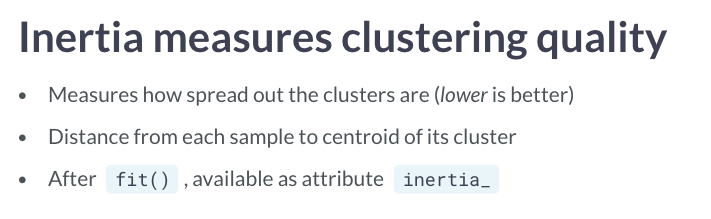

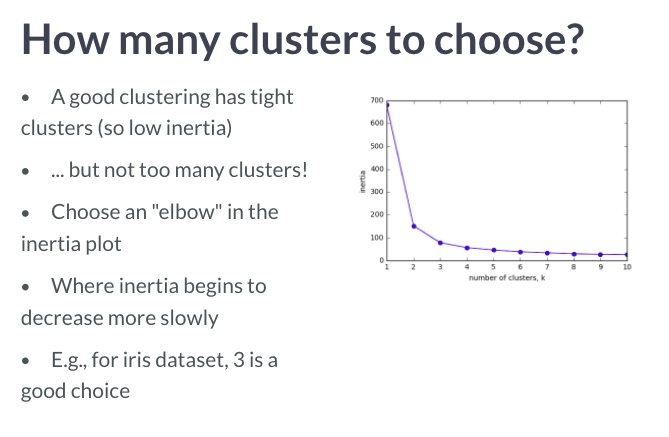


In [31]:
file = 'datasets/21_Unsupervised_Learning/Grains/seeds.csv'
df = pd.read_csv(file, header = None)

In [ ]:
df[7] = df[7].replace([1,2,3], [ "Kama", "Rosa" , "Canadian"])

In [ ]:
samples = df.iloc[:,:-1].values

In [ ]:
varieties = df.iloc[:,7].tolist()

In [ ]:
samples.shape

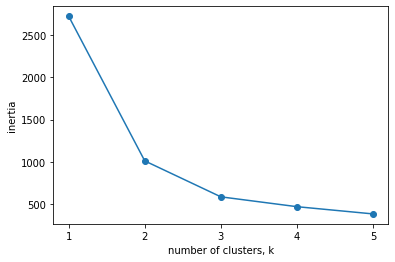

In [14]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [36]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters = 3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)
#Using .fit_predict() is the same as using .fit() followed by .predict().

# Create a DataFrame with labels and varieties as columns: df
df_pred = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df_pred['labels'],df_pred['varieties'])

# Display ct
print(ct)

varieties  Canadian  Kama  Rosa
labels                         
0                 0     1    60
1                68     9     0
2                 2    60    10


In [334]:
df_pred

,labels,varieties
0,2,Kama
1,2,Kama
2,2,Kama
3,2,Kama
4,2,Kama
5,2,Kama
6,2,Kama
7,2,Kama
8,2,Kama
9,2,Kama


The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the type of data you are working with, the clustering may not always be this good. Is there anything you can do in such situations to improve your clustering?

### Transforming features for better clustering 

In [39]:
file = 'https://assets.datacamp.com/production/repositories/655/datasets/fee715f8cf2e7aad9308462fea5a26b791eb96c4/fish.csv'
df = pd.read_csv(file,header = None)

In [51]:
df.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [52]:
samples = df.iloc[:,1:7].values
species = df.iloc[:,0].tolist()

In [55]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [56]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0     0      0     13
1           33     0      1      0
2            0    17      0      0
3            1     0     19      1


#### Another Example

https://campus.datacamp.com/courses/unsupervised-learning-in-python/clustering-for-dataset-exploration?ex=12

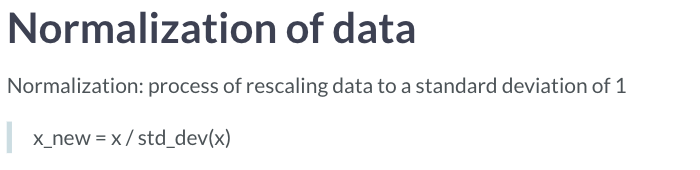

In [ ]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters= 10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

In [ ]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df)

In [ ]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

# 2. Visualizing with Hierarchical Clustering And t-SNE 

Hierarchical Clustering arranges samples into a hierarchy of clusters
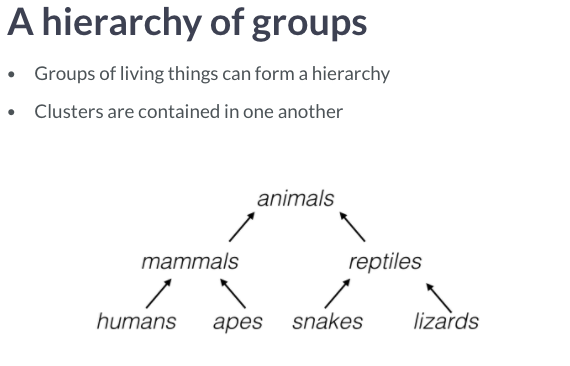

In [21]:
file = 'datasets/21_Unsupervised_Learning/Grains/seeds.csv'
df_ = pd.read_csv(file, header = None)

In [22]:
df_[7] = df_[7].replace([1,2,3], [ "Kama", "Rosa" , "Canadian"])

In [23]:
df = df_.groupby(7, group_keys=False).apply(lambda x: x.sample(20))

In [24]:
df.shape

(60, 8)

In [25]:
samples = df.iloc[:,:-1].values

In [26]:
varieties = df.iloc[:,7].tolist()

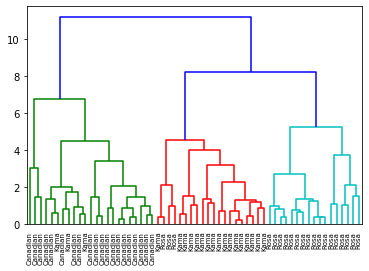

In [27]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=7,
)
plt.show()

IMPORTANT NOTE: 

a) the y axis in this dendrogram is the distance between merging clusters.

b) method = 'complete' means max. distance between 2 samples of clusters. THe other type of linkage method is called single linkage which measures distance between closest points in the cluster

SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer (see above).

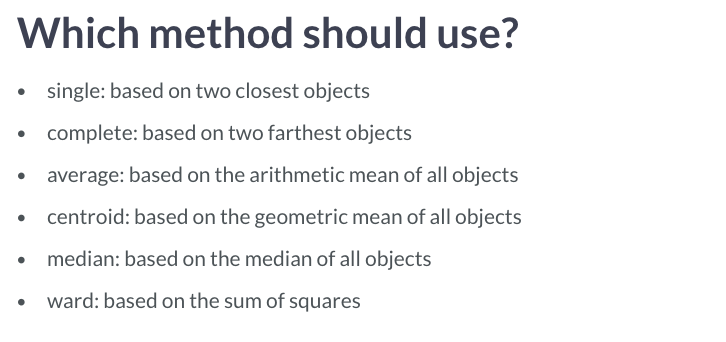

In [ ]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(
    mergings,
    labels=companies,
    leaf_rotation=90,
    leaf_font_size=6
)
plt.show()


### Cluster labels in hierarchical clustering


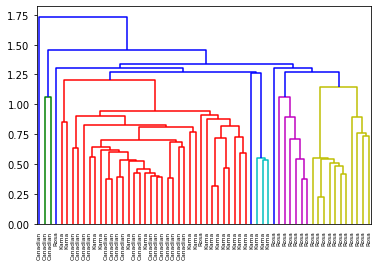

In [170]:

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [174]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian  Kama  Rosa
labels                         
1                 0     0    18
2                19     5     0
3                 1    15     2


### t-SNE for visualizing high dimensional data

In [182]:
file = 'datasets/21_Unsupervised_Learning/Grains/seeds.csv'
df = pd.read_csv(file, header = None)

In [ ]:
samples = df.iloc[:,:-1].values
varieties = df.iloc[:,7].tolist()

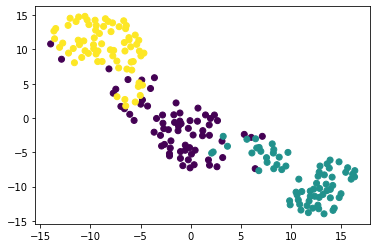

In [180]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate = 200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c = varieties)
plt.show()

IMPORTANT: the axes have no real meaning or interpretation. Execute same code to see axes changing. 

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

# 3. Decorrelation and Dimensionality Reduction

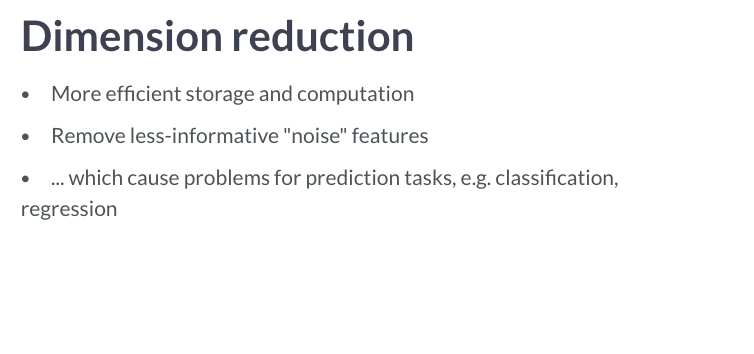

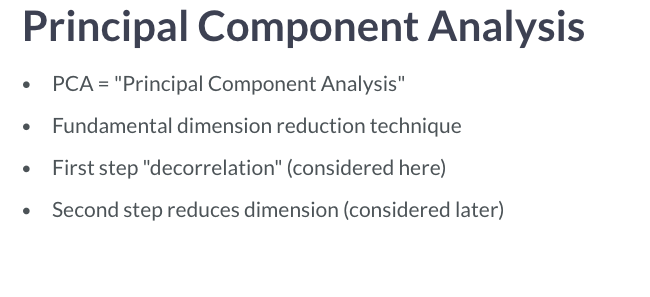

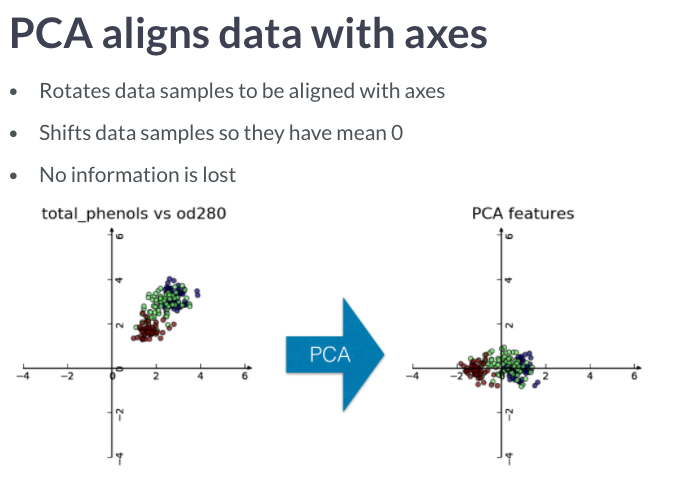

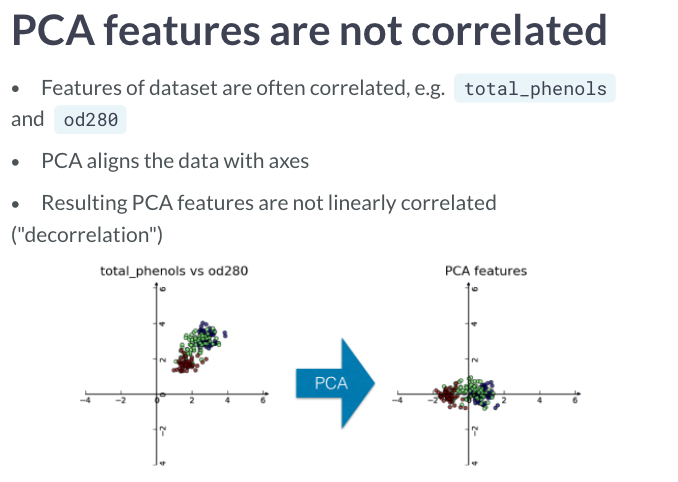

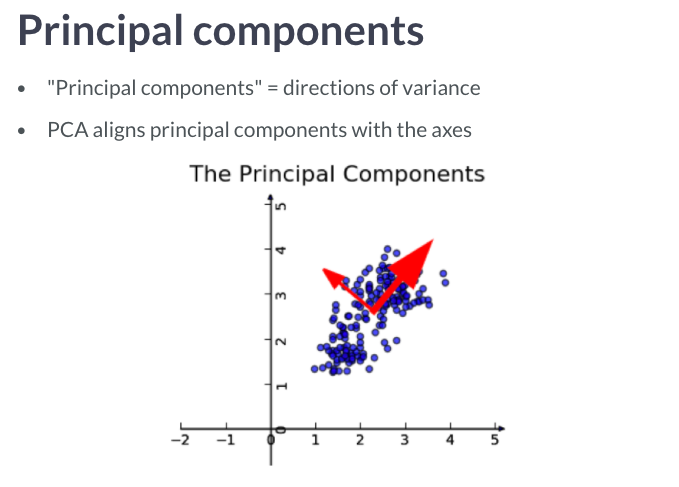

In [189]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


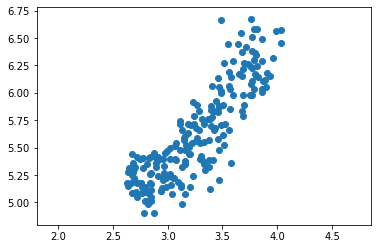

0.8604149377143466


In [188]:
# Perform the necessary imports
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = df.iloc[:,4].values

# Assign the 1st column of grains: length
length = df.iloc[:,3].values

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

In [192]:
grains = df.iloc[:,[4,3]].values

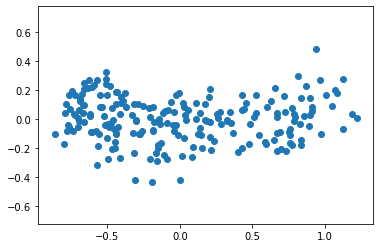

1.0408340855860843e-16


In [197]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

### Intrinsic Dimension

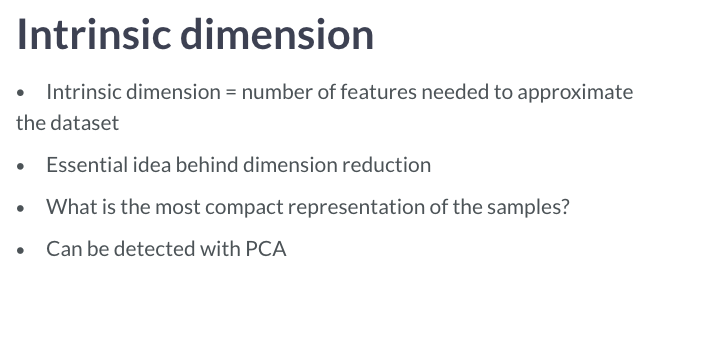

Example:

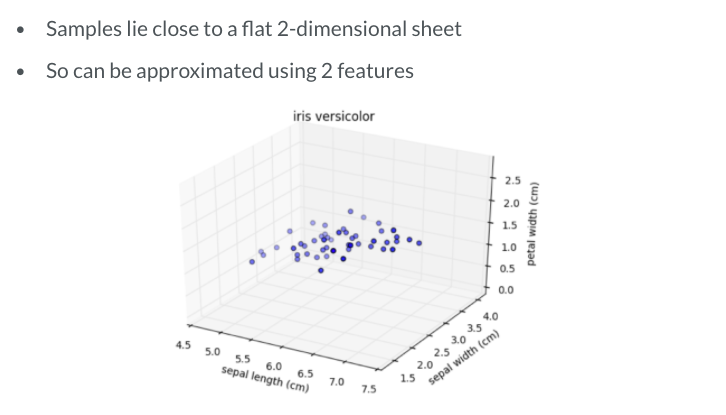

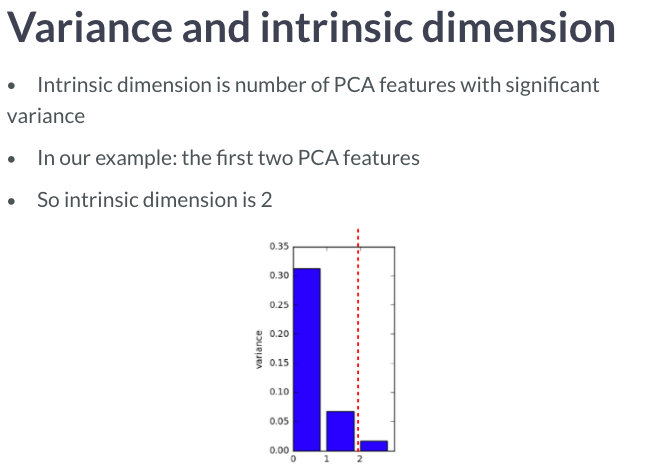


In [201]:
np.mean(grains[:,0])

3.258604761904762

The first principal component of the data is the direction in which the data varies the most. Below, we will use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

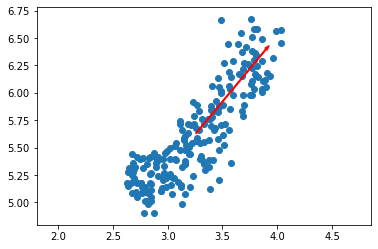

In [202]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

What if the data had more than 2 dimensions?

In [216]:
file = 'https://assets.datacamp.com/production/repositories/655/datasets/fee715f8cf2e7aad9308462fea5a26b791eb96c4/fish.csv'
df = pd.read_csv(file,header = None)

In [217]:
samples = df.iloc[:,1:7].values
species = df.iloc[:,0].tolist()

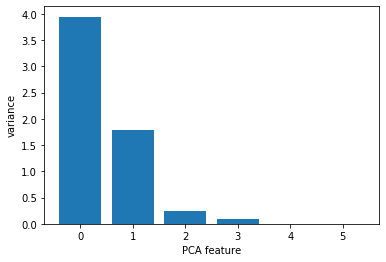

In [210]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


It looks like PCA features 0 and 1 have significant variance.

### Dimension Reduction with PCA

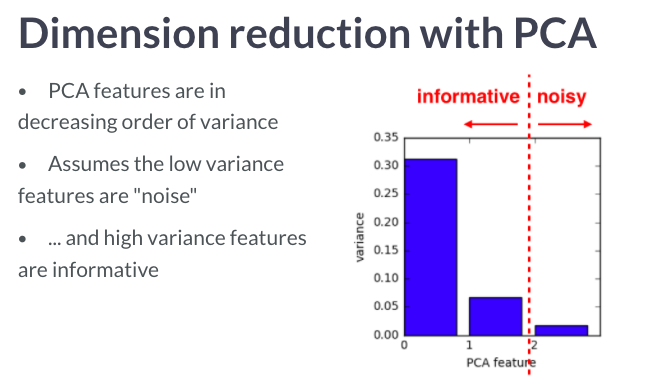

IMPORTANT NOTE!!!!: PCA ASSUMES HIGH VARIANCE IS MORE INFORMATIVE. SOMETIMES HIGH VARIANCE IS NOT!

In [218]:
scaled_samples = scaler.fit_transform(samples)

In [221]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)
print(scaled_samples.shape)

(85, 2)
(85, 6)


### A tf-idf word-frequency array

In [331]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [332]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


### Clustering Wikipedia Articles

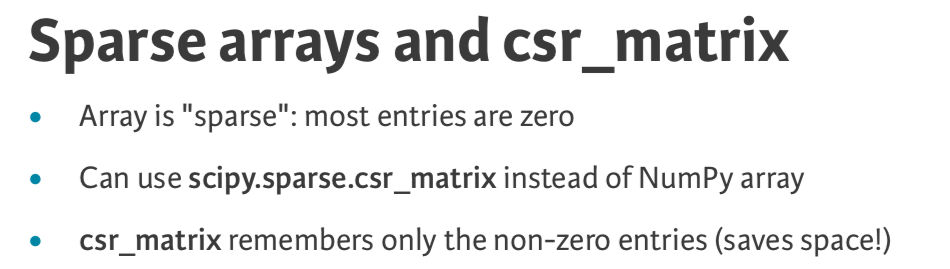

In [222]:
from scipy.sparse import csr_matrix

In [264]:
file = 'datasets/21_Unsupervised_Learning/Wikipedia/Wikipedia_articles/wikipedia-vectors.csv'
df = pd.read_csv(file, index_col = 0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)


The reason for taking this transpose is that without it, there would be 13,000 columns (corresponding to the 13,000 words in the file), which is a lot of columns for a CSV to have.

In [249]:
df.head(20)

,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.008878,0.000000,0.000000,0.049502,0.000000,0.000000,0.00000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006110,0.00000
2,0.000000,0.029607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.005646,0.000000,0.00000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,0.000000,0.000000,0.003772,0.000000,0.000000,0.000000,0.000000,0.000000,0.031222,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004690,0.000000,0.00000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.003638,0.000000,0.000000,0.000000,0.00000


In [252]:
df.shape

(13125, 60)

In [258]:
articles.shape

(60, 13125)

In [259]:
# Perform the necessary impots
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

In [261]:
labels.shape

(60,)

In [256]:
labels.shape

(13125,)

In [260]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))


    label                                        article
29      0                               Jennifer Aniston
28      0                                  Anne Hathaway
27      0                                 Dakota Fanning
26      0                                     Mila Kunis
25      0                                  Russell Crowe
24      0                                   Jessica Biel
23      0                           Catherine Zeta-Jones
22      0                              Denzel Washington
21      0                             Michael Fassbender
20      0                                 Angelina Jolie
0       1                                       HTTP 404
4       1                                  Google Search
1       1                                 Alexa Internet
5       1                                         Tumblr
6       1                    Hypertext Transfer Protocol
7       1                                  Social search
8       1                      

IMPORTANT: kmeans predictions are done on rows, which is why when creating CSR matrix, its important to transpose columns (i.e words) to rows.

# 4. Discovering Interpretable Features

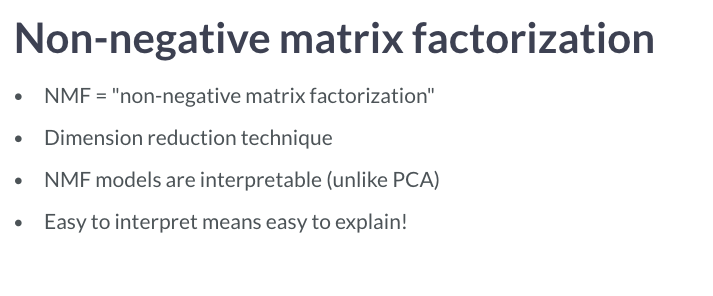

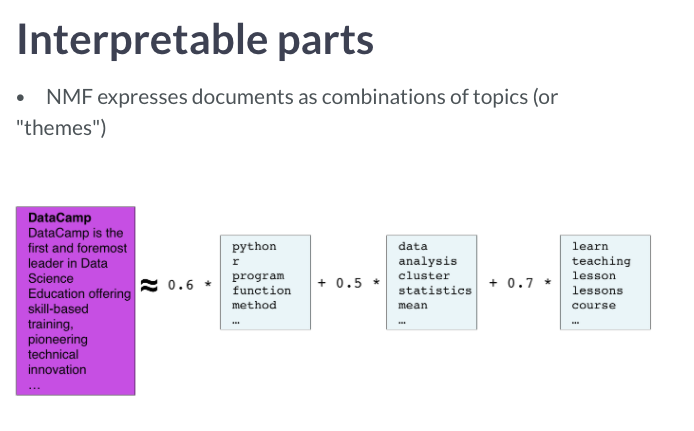

NMF Works with both numpy arrays, and sparse arrays in csr_matrix format. 

Just like PCA has components, NMF has components with dimensions equal to number of dimensions of the sampels. 

Entries of NMF are always non-negative. NMF ONLY FITS TO NON_NEGATIVE DATA.

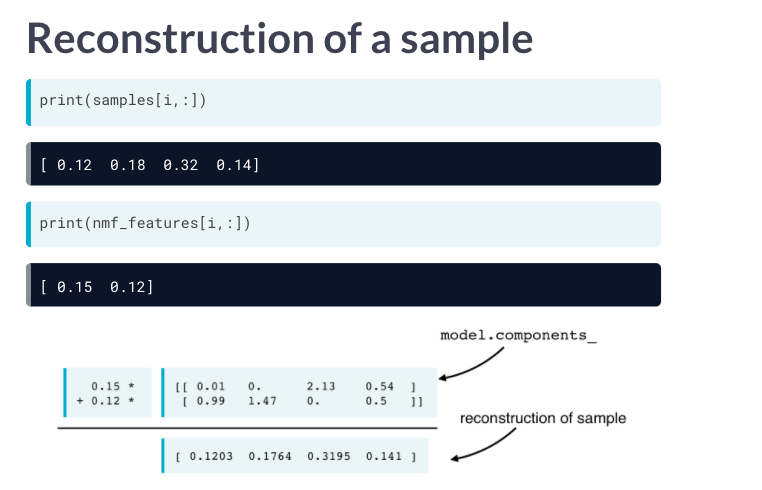

If we multiply each of the NMF components with corresponding feature values, the output is very close to the original dataset.

In [235]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components = 6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features[0:5])
print(nmf_features.shape)
print(articles.shape)

[[0.         0.         0.         0.         0.         0.44049514]
 [0.         0.         0.         0.         0.         0.56664278]
 [0.00382061 0.         0.         0.         0.         0.39867378]
 [0.         0.         0.         0.         0.         0.38176579]
 [0.         0.         0.         0.         0.         0.48554899]]
(60, 6)
(60, 13125)


In [245]:
print(nmf_features.shape)

(60, 6)


In [246]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index = titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003846
1    0.000000
2    0.000000
3    0.575711
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422380
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


Remember NMF components represent some topic... number 3 could be related to cinema/acting.

In [263]:
df.columns

Index(['label', 'article'], dtype='object')

In [266]:
df.columns

Index(['HTTP 404', 'Alexa Internet', 'Internet Explorer', 'HTTP cookie',
       'Google Search', 'Tumblr', 'Hypertext Transfer Protocol',
       'Social search', 'Firefox', 'LinkedIn', 'Global warming',
       'Nationally Appropriate Mitigation Action', 'Nigel Lawson',
       'Connie Hedegaard', 'Climate change', 'Kyoto Protocol', '350.org',
       'Greenhouse gas emissions by the United States',
       '2010 United Nations Climate Change Conference',
       '2007 United Nations Climate Change Conference', 'Angelina Jolie',
       'Michael Fassbender', 'Denzel Washington', 'Catherine Zeta-Jones',
       'Jessica Biel', 'Russell Crowe', 'Mila Kunis', 'Dakota Fanning',
       'Anne Hathaway', 'Jennifer Aniston', 'France national football team',
       'Cristiano Ronaldo', 'Arsenal F.C.', 'Radamel Falcao',
       'Zlatan Ibrahimović', 'Colombia national football team',
       '2014 FIFA World Cup qualification', 'Football', 'Neymar',
       'Franck Ribéry', 'Tonsillitis', 'Hepatitis B', '

In [269]:
data = pd.read_csv('datasets/21_Unsupervised_Learning/Wikipedia/Wikipedia_articles/wikipedia-vocabulary-utf8.txt', header = None)

In [275]:
data.shape

(13125, 1)

In [273]:
(data.loc[:,0]).tolist()

['aaron',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abbas',
 'abbey',
 'abbreviated',
 'abbreviation',
 'abc',
 'abdomen',
 'abdominal',
 'abdul',
 'abel',
 'abilities',
 'ability',
 'able',
 'abnormal',
 'abnormalities',
 'abnormally',
 'aboard',
 'abolish',
 'abolished',
 'abolishing',
 'abolition',
 'aboriginal',
 'abortion',
 'abraham',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorbs',
 'absorption',
 'abstract',
 'abstraction',
 'absurd',
 'abu',
 'abundance',
 'abundant',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'academia',
 'academic',
 'academics',
 'academies',
 'academy',
 'accelerate',
 'accelerated',
 'accelerating',
 'acceleration',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessed',
 'accessible',
 'accessing',
 'accession',
 'accessories',
 'accessory',
 'accident',
 'accidental',
 'accidenta

In [274]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=(data.loc[:,0]).tolist())

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

(6, 13125)
film       0.627877
award      0.253132
starred    0.245284
role       0.211451
actress    0.186398
Name: 3, dtype: float64


**IMPORTANT**

Remember: Features are used to reconsutruct samples by multiplying with components.

For example: 

Sample size => x,y
Features (*NMF(n_components = n).fit_transform(samples)*) Size => x,n
Components(*model.Components_*) size => n,y

SUCH THAT

Components (dot product) Features = Samples

### APPLYING NMF TO IMAGES

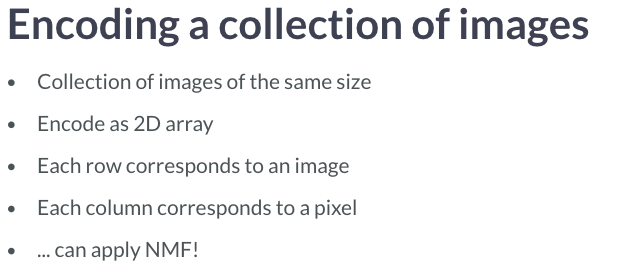

In [291]:
file = 'https://assets.datacamp.com/production/repositories/655/datasets/effd1557b8146ab6e620a18d50c9ed82df990dce/lcd-digits.csv'
df = pd.read_csv(file, header = None)

In [292]:
samples = np.array(df)

In [298]:
samples.shape


(100, 104)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


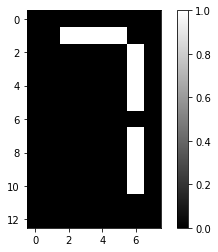

In [300]:
# Select the 0th row: digit
digit = samples[0]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [294]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

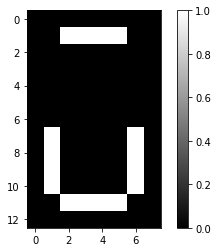

In [297]:
sample = samples[11]
show_as_image(sample)

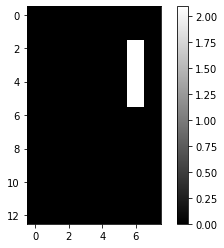

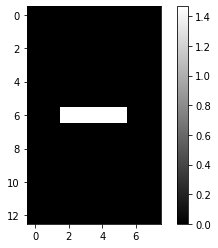

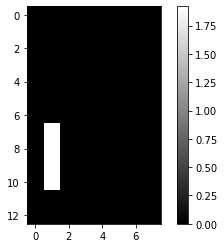

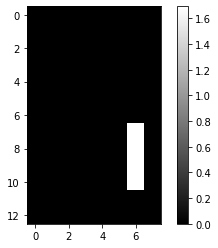

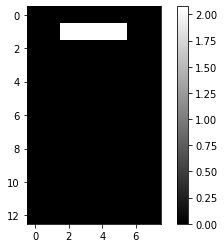

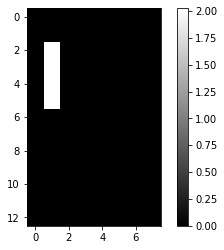

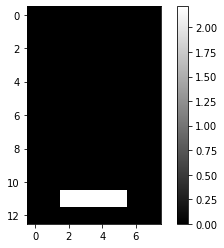

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37551667e-16]


In [305]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0]

# Print digit_features
print(digit_features)

Notice how each the entire digit is expressed as a some of its components

**PCA doesn't learn parts**
Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Let's verify this for ourselves by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise.

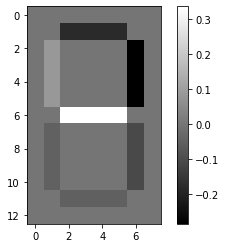

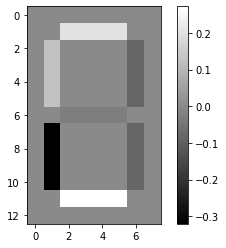

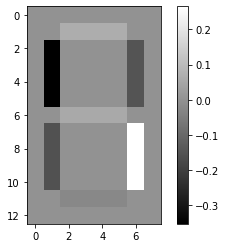

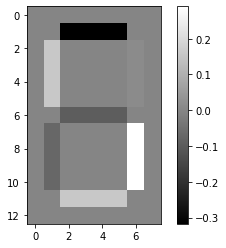

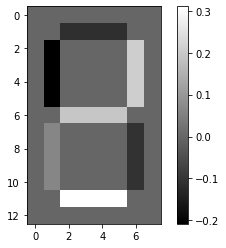

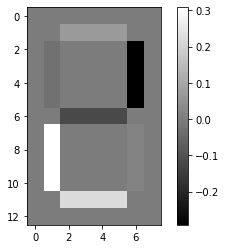

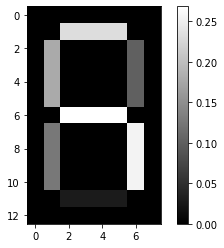

In [307]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    

### BUILDING RECOMMENDER SYSTEMS USING NMF

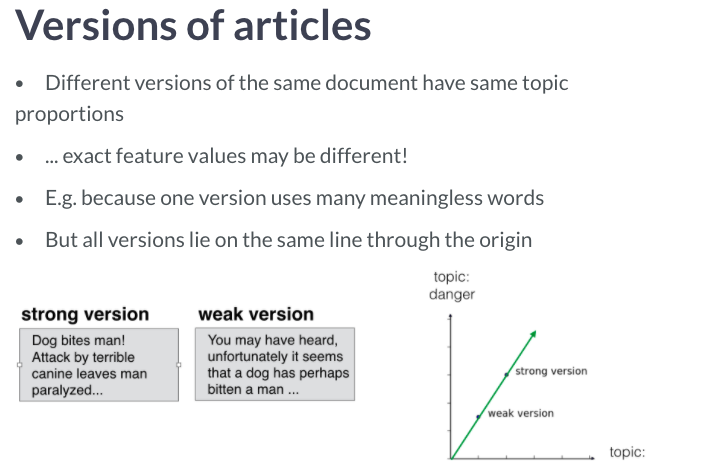

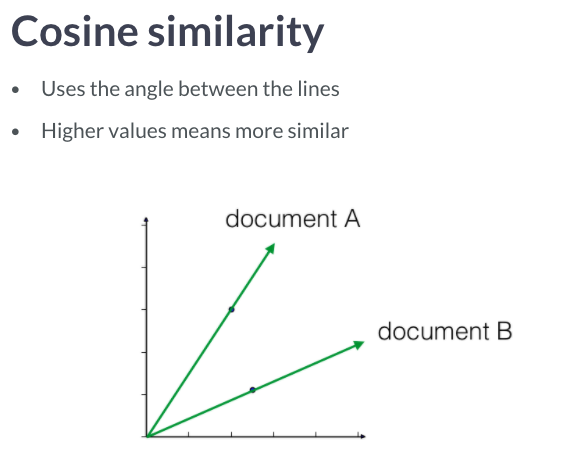

### Which articles are similar to Cristiano Ronaldo?

In [309]:
nmf_features

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.40495142e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.66642781e-01],
       [3.82061425e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.98673778e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.81765795e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.85548987e-01],
       [1.29293824e-02, 1.37893722e-02, 7.76352571e-03, 3.34485082e-02,
        0.00000000e+00, 3.34544590e-01],
       [0.00000000e+00, 0.00000000e+00, 2.06749870e-02, 0.00000000e+00,
        6.04512974e-03, 3.59085514e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.91008940e-01],
       [1.54277504e-02, 1.42821207e-02, 3.76646137e-03, 2.37111044e-02,
        2.62632035e-02, 

In [310]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


### Recommending Musical Artists Using Pipelines

In [321]:
file = 'datasets/21_Unsupervised_Learning/Musical_artists/artists.csv'
artistnames = pd.read_csv(file, header = None)

In [318]:
file2 = 'datasets/21_Unsupervised_Learning/Musical_artists/scrobbler-small-sample.csv'
playcount = pd.read_csv(file2)

In [323]:
artistnames.head()

,0
0,Massive Attack
1,Sublime
2,Beastie Boys
3,Neil Young
4,Dead Kennedys


In [324]:
playcount.head()

,user_offset,artist_offset,playcount
0,1,79,58
1,1,84,80
2,1,86,317
3,1,89,64
4,1,96,159


In [325]:
combined = pd.merge(artistnames, playcount, left_on=artistnames.index, right_on='artist_offset').drop('artist_offset', axis = 1)

In [342]:
combined = combined.pivot_table(values = "playcount",index = 0,columns = 'user_offset')

In [344]:
combined = combined.replace(np.nan,0)

In [346]:
from scipy.sparse import csr_matrix
artists = csr_matrix(combined)

In [347]:
artists

<111x500 sparse matrix of type '<class 'numpy.float64'>'
	with 2894 stored elements in Compressed Sparse Row format>

In [349]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

In [355]:
artist_names = artistnames[0].tolist()

In [357]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Foo Fighters']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Foo Fighters        1.000000
AC/DC               0.990768
Aimee Mann          0.986840
Rufus Wainwright    0.966541
Madonna             0.956032
dtype: float64
